# Example usage of the Performance Metric library

## Annotations

The library allows to compare two sets of annotations of a binary classification problem on a time series. In our application field this corresponds to labeling of epileptic seizures in an EEG recording.

Annotations are stored an can be loaded in one of two representations :
- Binary mask at the sampling frequency of labels (e.g. `11111100000111111111000000`)
- List of (start, stop) tuples representing the different events. These evens are stored in seconds (e.g. `[(0, 6), (11, 20)]`) 

In [1]:
from annotations import Annotation

# Annotation objects can be instantiated from a binary mask

fs = 1
mask = [0,1,1,0,0,0,1,1,1,0]

labels = Annotation(mask, fs)

print('Annotation objects contain a representation as a mask and as a list of events:')
print(labels.mask)
print(labels.events)


# The Annotation object can also be instantiated from a list of events
fs = 1
numSamples = 10  # In this case the duration of the recording in samples should be provided
events = [(1, 3), (6, 9)]

labels = Annotation(events, fs, numSamples)

Annotation objects contain a representation as a mask and as a list of events:
[False  True  True False False False  True  True  True False]
[(1.0, 3.0), (6.0, 9.0)]


## Scoring

The scoring module takes a reference annotation (ground-truth labels) and a hypothesis (e.g. output of an ML pipeline) and computes seizure detection performance metrics.

The class implements two types of scoring algorithms :
- Sample based scoring : Computes detections and errors on a sample by sample basis at the sampling frequency of the labels
- Event based scoring  : Computes detections and errors per event

In [2]:
import scoring

fs = 10
ref = Annotation([1,1,1,0,0,0,1,1,1,0], fs)
hyp = Annotation([0,1,1,0,1,1,0,0,1,0], fs)
scores = scoring.SampleScoring(ref, hyp)


print("# Sample scoring\n" +
      "- Sensitivity : {:.2f} \n".format(scores.sensitivity) + 
      "- Precision   : {:.2f} \n".format(scores.precision) + 
      "- F1-score    : {:.2f} \n".format(scores.f1) + 
      "- FP/24h      : {:.2f} \n".format(scores.fpRate))


# Scores can also be computed per event
param = scoring.EventScoring.Parameters(
    toleranceStart=0,
    toleranceEnd=0,
    minOverlap=0.66,
    maxEventDuration=5*60)
scores = scoring.EventScoring(ref, hyp, param)

print("# Event scoring\n" +
      "- Sensitivity : {:.2f} \n".format(scores.sensitivity) + 
      "- Precision   : {:.2f} \n".format(scores.precision) + 
      "- F1-score    : {:.2f} \n".format(scores.f1) + 
      "- FP/24h      : {:.2f} \n".format(scores.fpRate))

# Sample scoring
- Sensitivity : nan 
- Precision   : 0.00 
- F1-score    : nan 
- FP/24h      : 86400.00 

# Event scoring
- Sensitivity : 0.50 
- Precision   : 1.00 
- F1-score    : 0.67 
- FP/24h      : 0.00 



## Visualization

Visualization is provided by :
- `plotSampleScoring`
- `plotEventScoring`

Both functions take a reference and hypothesis Annotation object as an input and return a `matplotlib.pyplot.figure` object as output.

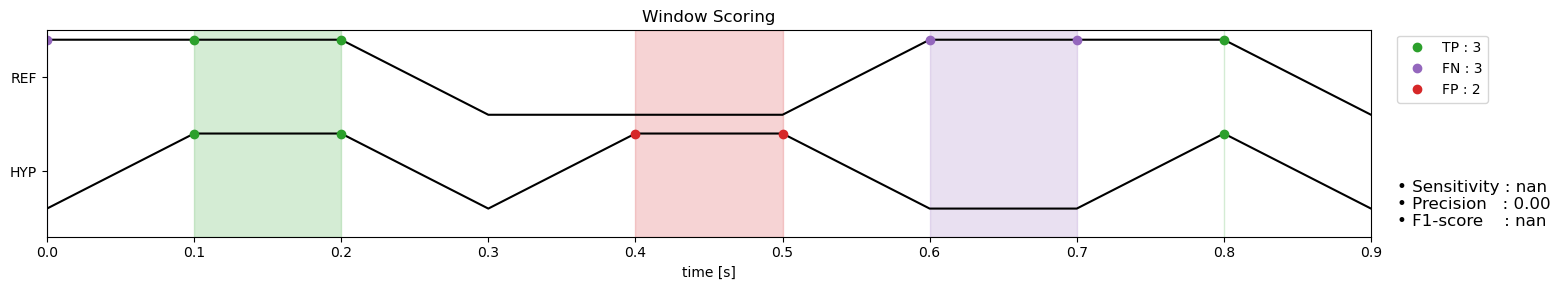

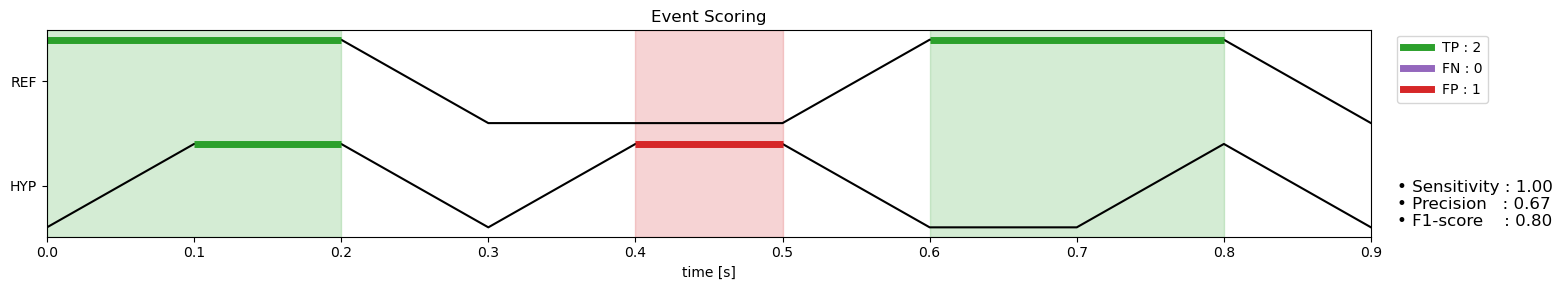

In [3]:
import visualization
import matplotlib.pyplot as plt

param = scoring.EventScoring.Parameters(
    toleranceStart=0,
    toleranceEnd=0,   
    minOverlap=0,
    maxEventDuration=5*60)

visualization.plotSampleScoring(ref, hyp)
visualization.plotEventScoring(ref, hyp, param)

plt.show()